# WEEK 3

Anthony Manikhouth M1 LSI2

# Assignment 2

In this Assignment, you will explore the **FIFA 19** dataset, which contains detailed attributes for every player registered in the latest edition of FIFA 19 database.    
It was scrapped from this [website](https://sofifa.com/), and you can find the source code [here](https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019).

Your goal is to find out how the `Overall` score by player is calculated

There are 2 main parts:

* Data Import & Cleaning, the output of this part is provided in the csv file `Assignment_2_data_cleaned`, **so you do not need to have everything right in this part to do the second one**
* Modeling with the cleaned data

In the notebook, there will be cells in the form `assert condition` like the next one. They are used to check if an answer is correct.  
Execute the next one and you will get no errors

In [1]:
assert 3 < 5

Execute the next one and you will get an error

In [2]:
# assert 3 > 5
# Error as 3 > 5 is false

AssertionError: 

# Data Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1.1. Load the csv file `data.csv` into a dataframe called `df` and print its shape. (Set the right parameters when reading the csv file)       

In [96]:
df = pd.read_csv("Assignment_2_data.csv")
df = df.iloc[:, 1:] # We remove the first column as it is empty
print("Shape: ", df.shape)

Shape:  (18207, 88)


In [7]:
# check if your answer is correct
assert df.shape == (18207, 88)

1.2. print the head of `df`

In [8]:
print(df.head())

       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

             

1.3. Print how many columns that are in df columns types

In [9]:
print(df.columns.size)

88


1.4. `to_drop` is a list containing columns that are not useful for modeling, remove them and print the new shape of `df`

In [97]:
to_drop =['ID', 'Name', 'Photo','Nationality', 'Flag','Club','Club Logo', 'Real Face', 'Joined', 'Loaned From', 'Contract Valid Until']
for i in to_drop:
    df.pop(i)

In [98]:
# check if your answer is correct
assert df.shape == (18207, 77)

# Data Cleaning

## Handling missing values

2.1. Build a dataframe called `missing` which has the following format:

* `pct` is the percentage of missing values, **takes values between `0` and `100`**
* the index is the column names

|     | pct |
|-----|-----|
|......|.....|
|Strength |0.263635|
|.....|.....|



In [99]:
missing = pd.DataFrame(df.isnull().sum() / len(df) *100)
missing.columns = ["pct"]
print(missing)

                     pct
Age             0.000000
Overall         0.000000
Potential       0.000000
Value           0.000000
Wage            0.000000
...                  ...
GKHandling      0.263635
GKKicking       0.263635
GKPositioning   0.263635
GKReflexes      0.263635
Release Clause  8.590103

[77 rows x 1 columns]


2.2. Remove from `missing`, rows with `pct`= 0   
sort `missing` in ascending order of `pct` and print its head

In [100]:
missing = missing[(missing.pct != 0)]
missing.sort_values(by="pct", ascending=True)
print(missing.head())

                               pct
Preferred Foot            0.263635
International Reputation  0.263635
Weak Foot                 0.263635
Skill Moves               0.263635
Work Rate                 0.263635


2.3. Now, let's fill missing values where the % of missing is lower than 1 (1%).   
First identify these columns in a list named `cols_to_fill`

In [101]:
cols_to_fill = missing[(missing.pct > 0) & (missing.pct < 1)].index.tolist()
print(len(cols_to_fill), type(cols_to_fill))
print(cols_to_fill)

44 <class 'list'>
['Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [102]:
# check if your answer is correct
assert len(cols_to_fill) == 44; assert isinstance(cols_to_fill, list)

2.4. define a function (`fill_nas_by_type`) to fill null values by column type:

* if a column type is `Object`, fill it with the **most frequent value**
* otherwise, fill it with the **median value**

In [135]:
def fill_nas_by_type(df: pd.DataFrame, col_name):
    """Fill null values in df according to col_name type
    
    Parameters
    ----------
    df : dataframe, (default=None)
        input dataframe
    col_name : str, (default=None)
        column with null values to fill
        
    Returns
    -------
    df with filled values in col_name
    """
    if df[col_name].dtype == "object":
        df[col_name].fillna(df[col_name].mode()[0], inplace=True)
    else:
        df[col_name].fillna(df[col_name].median(), inplace=True)
    
    return df

Loop through `cols_to_fill` and apply the defined function `fill_nas_by_type` to fill null values

In [136]:
for i in cols_to_fill:
    df = fill_nas_by_type(df, i)

In [138]:
# check if your answer is correct
assert df[cols_to_fill].isnull().sum().sum() == 0

For the remaining missing values, let's just remove them.    
Print the shape of `df` before and after removing any rows with missing observations

In [140]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(18207, 77)
(14743, 77)


In [141]:
# check if your answer is correct
assert df.shape == (14743, 77); assert df.isnull().sum().sum() == 0

## Correct some columns format

### Monetary columns

In [142]:
money_cols = ['Value','Wage', 'Release Clause']
df[money_cols].head()

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
4,€102M,€355K,€196.4M
5,€93M,€340K,€172.1M


3.1. Build a function which extracts the monetary value from a string. It should return a number with no decimals.   
Your function should pass the three tests in the cell after

In [143]:
def get_value(value_text):
    """Extract the monetary value from a string
    
    Parameters
    ----------
    value_text: str, (default=None)
        a string containing a number ending with M, K or nothing
        
    Returns
    -------
    a float with no decimals
    
    Examples
    --------
    >>> get_value('€7.1K')
    7100.0
    """
    multiplier = value_text[-1]
    if multiplier == 'M':
        number = float(value_text[1:-1])
        return number * 1000000
    elif multiplier == 'K':
        number = float(value_text[1:-1])
        return number * 1000
    else:
        return float(value_text[1:])    

In [144]:
# check if your answer is correct
assert get_value('€110.5M') == 110500000; assert get_value('€7.1K') == 7100; assert get_value('€200') == 200

3.2. Loop through `money_cols` and apply the defined function `get_value` to convert them to numeric

In [145]:
for f in money_cols:
    df[f] =df[f].apply(get_value)
    print(f, df[f].dtype, df[f].isnull().sum())

Value float64 0
Wage float64 0
Release Clause float64 0


In [146]:
# check if your answer is correct
assert df[money_cols].isnull().sum().sum() == 0

### Height and Weight columns

4.1. Start by printing the unique values for `Height`

In [147]:
# print unique values for Height
df['Height'].unique()

array(["5'7", "6'2", "5'9", "5'11", "5'8", "6'0", "5'6", "5'10", "6'1",
       "5'4", "6'3", "6'4", "5'5", "6'6", "6'5", "5'3", "5'2", "6'7",
       "5'1", "6'8"], dtype=object)

4.2. Write a function (`get_height`) which converts the Height from a string in feet to  a number in `cm` with no decimals.    
1 feet = 30.48 cm. For example `get_height("5'10")` = `155`

In [148]:
def get_height(x):
    return  round(float(x.replace("'", ".")) * 30.48, 0) 

In [149]:
# check if your answer is correct
assert get_height("5'10") == 155; assert get_height("6'8") == 207

Apply the previous defined function on `Height`

In [150]:
df['Height'] = df['Height'].apply(get_height)

In [151]:
# check if your answer is correct
assert df['Height'].dtype == 'float64'; assert df['Height'].isnull().sum() == 0

4.3. The same thing with `Weight`, print the unique values

In [152]:
# print unique values for Weight
df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '154lbs', '163lbs', '146lbs',
       '190lbs', '181lbs', '176lbs', '168lbs', '172lbs', '148lbs',
       '165lbs', '196lbs', '161lbs', '170lbs', '187lbs', '157lbs',
       '185lbs', '130lbs', '174lbs', '203lbs', '207lbs', '134lbs',
       '141lbs', '152lbs', '179lbs', '132lbs', '198lbs', '201lbs',
       '209lbs', '214lbs', '143lbs', '192lbs', '137lbs', '194lbs',
       '139lbs', '220lbs', '205lbs', '216lbs', '126lbs', '123lbs',
       '128lbs', '223lbs', '212lbs', '121lbs', '115lbs', '218lbs',
       '117lbs', '243lbs', '110lbs', '119lbs', '234lbs'], dtype=object)

4.4. Write a function (`get_weight`) which converts the **Weight** from a string in `lbs` to a number in `kg` with no decimals.    
1 lbs = 0.453592 kg. For example `get_weight("115lbs")` = `52`

In [153]:
def get_weight(x):
    return  round(float(x.split('lbs')[0]) * 0.453592, 0)

In [154]:
# check if your answer is correct
assert get_weight("115lbs") == 52; assert get_weight("234lbs") == 106

Apply the previous defined function on `Weight`

In [155]:
df['Weight'] = df['Weight'].apply(get_weight)

In [156]:
# check if your answer is correct
assert df['Weight'].dtype == 'float64'; assert df['Weight'].isnull().sum() == 0

## Convert text columns to numeric

5.1. Identify non-numeric text columns in a list called `text_cols`

In [169]:
text_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

30


5.2. Build a list named `cols_to_remove` containing columns from `text_cols`, if a column has a number of unique values greater than **10** (`> 10`)

In [168]:
cols_to_remove = []
for i in text_cols:
    if df[i].unique().size > 10:
        cols_to_remove.append(i)

27


remove `cols_to_remove` columns from `df` and print its shape

In [170]:
for i in cols_to_remove:
    df.pop(i)

In [171]:
# check if your answer is correct
assert df.shape == (14743, 50)

5.3. Identify the remaining text columns in `text_cols` as `remaining_text_cols`, make sur it passes the test after

In [180]:
remaining_text_cols = list(set(text_cols) - set(cols_to_remove))
print(len(remaining_text_cols))

3


In [181]:
# check if your answer is correct
assert remaining_text_cols == ['Work Rate', 'Body Type', 'Preferred Foot']

5.4. Loop through `remaining_text_cols` and convert them to numerical values

In [183]:
for i in remaining_text_cols:
    if i == "Work Rate":
        df[i] = df[i].map({"Low/ Low": 0, "Medium/ Low": 1, "Low/ Medium": 1, "Medium/ Medium": 2, "High/ Low": 3, "Low/ High": 3, "High/ Medium": 4, "Medium/ High": 4, "High/ High": 6}).fillna(2, inplace=True)
    elif i == "Body Type":
        df[i] = df[i].map({"Lean": 0, "Normal": 1, "Stocky": 2, "Messi": 3, "Ronaldo": 3, "Neymar": 3}).fillna(4, inplace=True)
    elif i == "Preferred Foot":
        df[i] = df[i].map({"Right": 1, "Left": 0}).fillna(1, inplace=True)

In [184]:
df.shape

(14743, 50)

# Model building

As stated before, you can do this part without completing the previous one

6.1. Load the cleaned dataset `Assignment_2_data_cleaned.csv` into `df_clean` and print its shape.    

In [186]:
df_clean = pd.read_csv("Assignment_2_data_cleaned.csv")

6.2. Load the target variable `Overall` into a dataframe and name it `y`. Then, load the features into a second dataframe and name it `X`. Plot a histogram of `y`, choose the number of bins as 100.

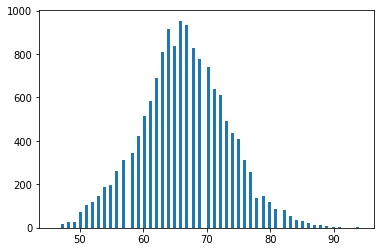

In [193]:
y = df_clean["Overall"]
x = df_clean.drop("Overall", axis="columns")

plt.hist(y, bins=100)
plt.show()

7. Split the data set into a training set and a test set. Choose `test_size` = 0.3 and `random_state` = 123  
Print train and test size      
**Attention**: You are asked to use  [`sklearn.model_selection`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [194]:
from sklearn.model_selection import train_test_split
def split(x, y, test_size = 0.3, random_state=123):    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split(x, y)
print("x: train and test")
print(len(x_train))
print(len(x_test))
print("y: train and test")
print(len(y_train))
print(len(y_test))

10320
4423


8. Fit a linear model to the training set, and then report the training and testing errors obtained (the R2 statistic).   
Calculate and print the following metrics: mse, rmse, mae for the test_set

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

reg = LinearRegression()
reg.fit(x_train, y_train)
train_score = reg.score(x_train, y_train)
test_score = reg.score(x_test, y_test)
print("Train score: " , train_score)
print("Test score: ", test_score)

Train score:  0.9370091958866428
Test score:  0.9357188804625101


In [196]:
import math

y_pred = reg.predict(x_test) 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse = {}, rmse = {} mae = {} r2 = {}".format(mse, math.sqrt(mse), mae, r2))

mse = 3.0074136038083257, rmse = 1.7341896101085157 mae = 1.356192613160754 r2 = 0.9357188804625101


### Check residuals

9.1. Plot a histogram of the residuals (difference between `y_test` and `y_pred`

<AxesSubplot:>

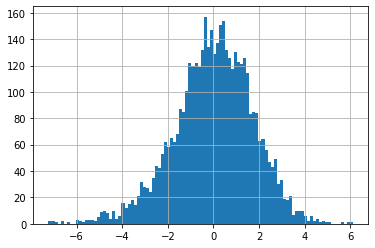

In [197]:
resids = y_test - y_pred
resids.hist(bins=100)

9.2. Plot a scatter plot where `y_test` is in the **x** axis and  `y_pred` is in the **y** axis

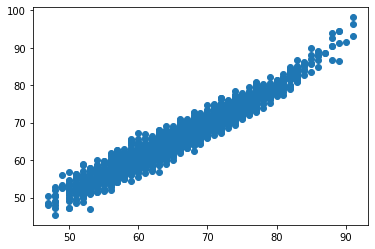

In [198]:
plt.scatter(y_test, y_pred)

10. Try to improve the performance of your model, by adding new features

In [ ]:
# your code here